# Distance matrix

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from tqdm import tqdm
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import colors

from helper_functions import cm_to_inch 

In [4]:
plt.style.use(['seaborn'])
plt.rcParams["font.family"] = "Times new roman"
plt.rcParams['axes.axisbelow'] = True
plt.rcParams['font.size'] = 15
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15

In [2]:
daily_user_profiles = pd.read_excel('daily_user_profiles.xlsx', index_col=0)
weekly_user_profiles = pd.read_excel('weekly_user_profiles.xlsx', index_col=0)
monthly_user_profiles = pd.read_excel('monthly_user_profiles.xlsx', index_col=0)

In [35]:
def minkowski_distance(a, b):
    dist = np.linalg.norm(a - b)
    return np.sum(dist)

def create_distance_matrix(time_series):
    N = len(time_series.columns)
    col = time_series.columns
    dist_matrix = np.zeros([N, N], float)
    for i in tqdm(range(N)):
        for j in range(i + 1, N, 1):
            dist_matrix[i, j] = minkowski_distance(time_series[col[i]], time_series[col[j]])
            dist_matrix[j, i] = dist_matrix[i, j]
    dist_matrix = (dist_matrix - min(dist_matrix.ravel())) / (max(dist_matrix.ravel()) - min(dist_matrix.ravel()))
    return dist_matrix

In [36]:
day_dist_matrix = create_distance_matrix(daily_user_profiles)

100%|██████████████████████████████████████████████████████████████████████████████| 2529/2529 [09:18<00:00,  4.53it/s]


In [37]:
week_dist_matrix = create_distance_matrix(weekly_user_profiles)

100%|██████████████████████████████████████████████████████████████████████████████| 2529/2529 [09:17<00:00,  4.54it/s]


In [ ]:
month_dist_matrix = create_distance_matrix(monthly_user_profiles)

In [38]:
def plot_matrix(matrix, save_path=None):
    plt.figure(figsize = (cm_to_inch(15), cm_to_inch(15)))
    ax = plt.gca()
    im = ax.imshow(matrix, cmap=plt.cm.get_cmap('jet', 5))
    plt.xlabel("X", fontsize=15)
    plt.ylabel("Y", fontsize=15)
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    plt.colorbar(im, cax=cax)
    plt.tight_layout()
    if save_path:
        plt.savefig(save_path, dpi=200, bbox_inches='tight')
        plt.close()

In [47]:
def plot_binary_matrix(matrix, save_path=None):
    
    x = np.ma.filled(matrix < 0.1)
    x = np.multiply(x, 1.0)
    
    # make a color map of fixed colors
    cmap = colors.ListedColormap(['black', 'white'])

    plt.figure(figsize = (cm_to_inch(15), cm_to_inch(15)))
    ax = plt.gca()
    im = ax.imshow(x, origin='lower', cmap=cmap) # cmap='viridis'
    plt.gca().invert_yaxis()
    plt.xlabel("X", fontsize=15)
    plt.ylabel("Y", fontsize=15)
    
    # make a color bar
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    cb = plt.colorbar(im, cax=cax, ticks=[0.0, 1.0])

    plt.tight_layout()
    if save_path:
        plt.savefig(save_path, dpi=200, bbox_inches='tight')
        plt.close()

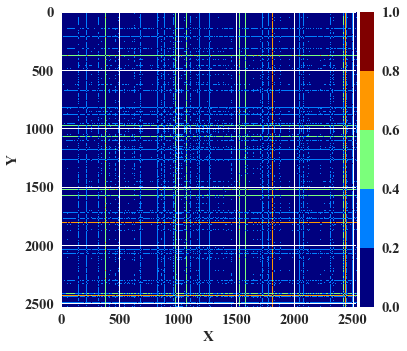

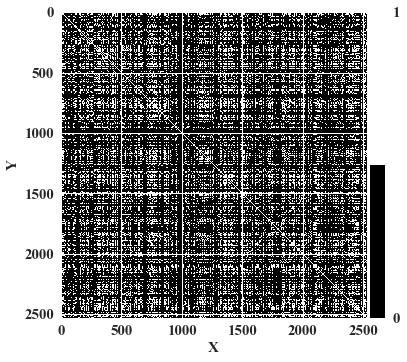

In [48]:
plot_matrix(week_dist_matrix)
plot_binary_matrix(week_dist_matrix)

In [49]:
df_day_matrix = pd.DataFrame(day_dist_matrix)
df_week_matrix = pd.DataFrame(week_dist_matrix)
df_month_matrix = pd.DataFrame(month_dist_matrix)

In [50]:
df_day_matrix.to_excel('day_dist_matrix.xlsx')
df_week_matrix.to_excel('week_dist_matrix.xlsx')
df_month_matrix.to_excel('month_dist_matrix.xlsx')